In [1]:
#import pydotplus
from IPython.display import display, Image
import matplotlib.pyplot as plt
import pytesseract
#from gtts import gTTS
import IPython.display as ipd
#from requests import get  # to make GET request

#image processing imports
import re
import cv2 
import numpy as np
from pytesseract import Output

In [4]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [5]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\SaLmA\anaconda3\envs\tesseract\Library\bin\tesseract.exe'

# camera

In [4]:

port=0
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(port)
while True:
    try:
        check, frame = webcam.read()
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'): 
            cv2.imwrite(filename='saved_img.png', img=frame)
            webcam.release()
            img_new = cv2.imread('saved_img.png')
            img_new = cv2.imshow("Captured Image", img_new)
            cv2.waitKey(1650)
            cv2.destroyAllWindows()
            break
        elif key == ord('q'):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
        
    except(KeyboardInterrupt):
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

In [5]:
IMG_DIR = 'images/'

# Firstly: Apply OCR on the captured image
before ocr, the image must br processed for enhancment of OCR

# img preprocessing
after every thing , the image will be in 'jpeg' extension that is better for OCR

# 1- Image Geometric Transformations for captured Image

[OSD] Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 4.30
Script: Latin
Script confidence: 3.64

[ANGLE] 0.0
Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 4.30
Script: Latin
Script confidence: 3.64



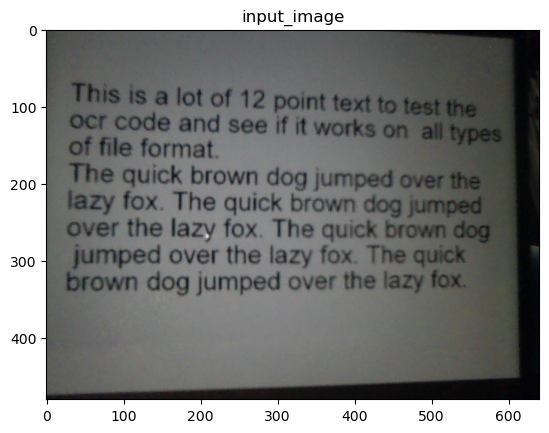

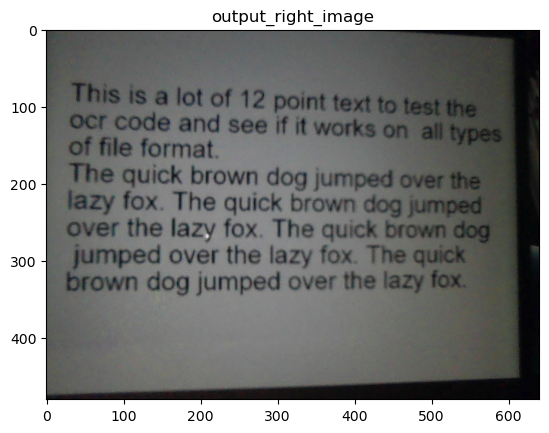

True

In [6]:
# rotation image code                    ##############not working
image= cv2.imread('saved_img.png')

rot_data = pytesseract.image_to_osd(image);
print("[OSD] "+rot_data)
rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)

angle = float(rot)
if angle > 0:
    angle = 360 - angle
print("[ANGLE] "+str(angle))

  # rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h),
flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)	

# TODO: Rotated image can be saved here
print(pytesseract.image_to_osd(rotated));

  # Run tesseract OCR on image
#text = pytesseract.image_to_string(rotated, lang='ara+eng', config="custom")
  # Print recognized text
#print(text)
#print(text.encode(encoding='UTF-8'))
plt.imshow(image)
plt.title("input_image")
plt.show()

plt.imshow(rotated)
plt.title("output_right_image")
plt.show()

cv2.imwrite('saved_img_rot.png', rotated) 
#cv2.imshow('saved_img_rot.png')


# 2- increasing Image Contrast _ CLAHE


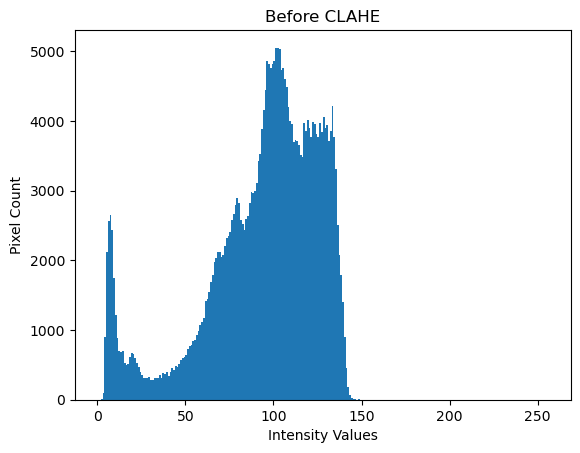

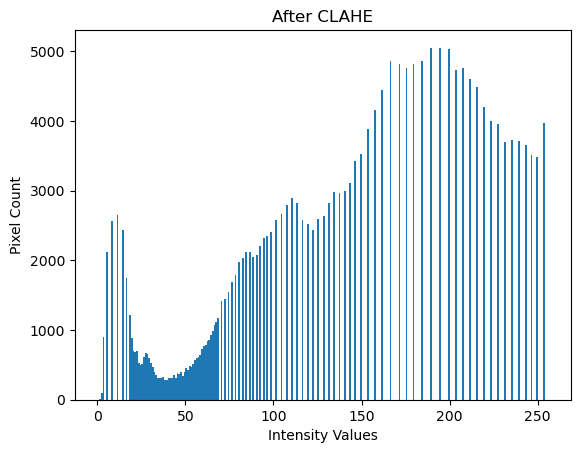

In [7]:

#img =Image.open('saved_img.png')  ############it is suggested to put the rotated image 
img = cv2.imread('saved_img_rot.png',0)


#Initialize intensity values with 256 zeroes
intensity_count = [0] * 256         

height,width = img.shape[:2]       
N = height * width                  

	#Array for new_image
high_contrast = np.zeros(img.shape) 

for i in range(0,height):
    		for j in range(0,width):
        			intensity_count[img[i][j]] += 1     #Find pixels count for each intensity

L = 256

intensity_count,total_values_used = np.histogram(img.flatten(),L,[0,L])      
pdf_list = np.ceil(intensity_count*(L-1)/img.size)                    #Calculate PDF
cdf_list = pdf_list.cumsum()                                            	#Calculate CDF


for y in range(0, height):
    		for x in range(0, width): 
			#Apply the new intensities in our new image
        			high_contrast[y,x] = cdf_list[img[y,x]]                         

	
#PLOT THE HISTOGRAMS
cv2.imwrite('high_contrast.png', high_contrast)  

plt.hist(img.ravel(),256,[0,256])
plt.title("Before CLAHE")
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

plt.hist(high_contrast.ravel(),256,[0,256])	
plt.title("After CLAHE")
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()



#plt.imshow(img)
#plt.title('low contast Image)
#plt.show()          

#plt.imshow(high_contrast)
#plt.title('High Contrast Image)
#plt.show()


# 3- Bluring -- Noise Removal


In [8]:
#pip install wand
# install ImageMagick from here: https://imagemagick.org/script/download.php#windows 

In [9]:
# import Image from wand.image module          #هنحذفها دي 
from wand.image import Image
 
with Image(filename ='high_contrast.png') as img:
    # perform despeckle effect
    img.despeckle()
 
    # save final image
    img.save(filename ="despeckle_filter.png")
#plt.imshow("despeckle_filter.png")
#plt.title('blured Image)
#plt.show() 


# 4- sharpening blured image  

Image Sharpened.


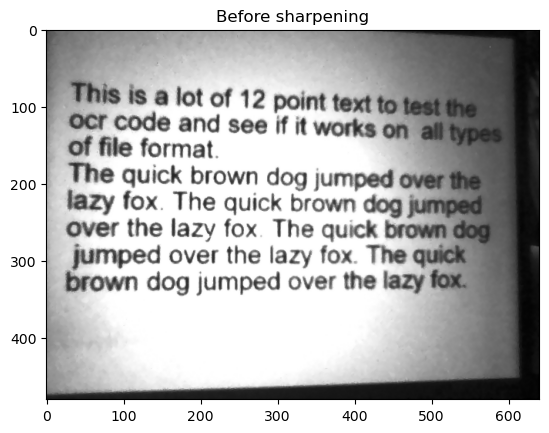

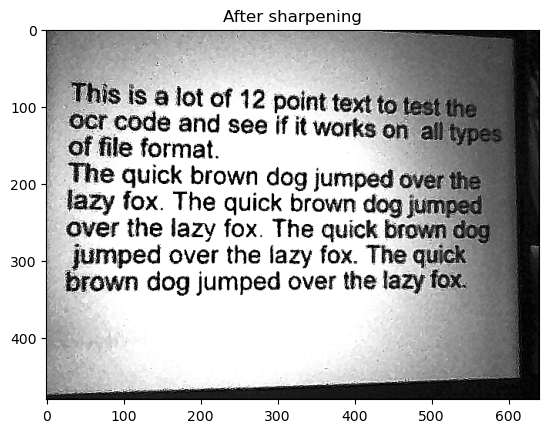

In [10]:
#we can use edge enhancement instead 
#reading imagae from file
img = cv2.imread('despeckle_filter.png') #Add your png or jpg file here
#SHARPENING EFFECT
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img,-1,kernel_sharpening)
#completion message
print('Image Sharpened.')

cv2.imwrite("sharpened image.png",sharpened)

#comparing original vs resized
plt.imshow(img)
plt.title("Before sharpening")
plt.show()
#cv2.imshow('ORIGINAL',img)

plt.imshow(sharpened)
plt.title("After sharpening")
plt.show()
#cv2.imshow('sharpened image',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 5- Image Binarization

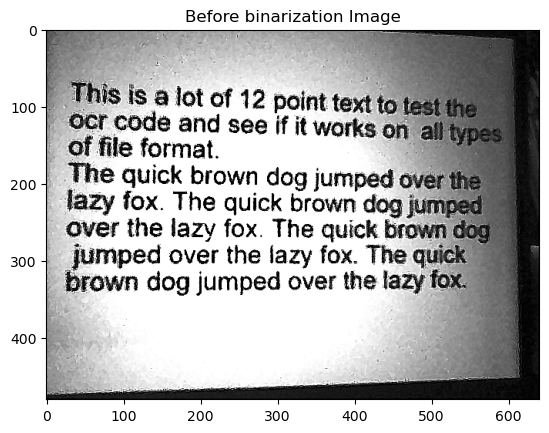

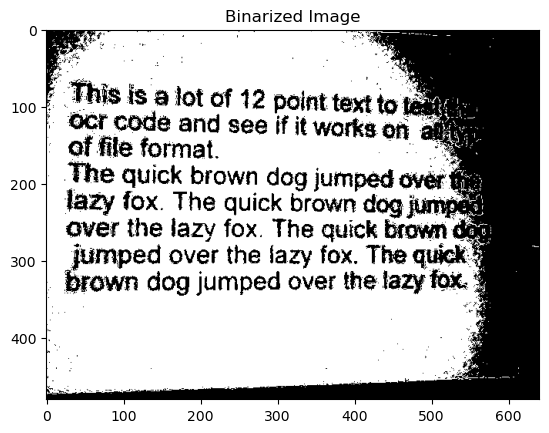

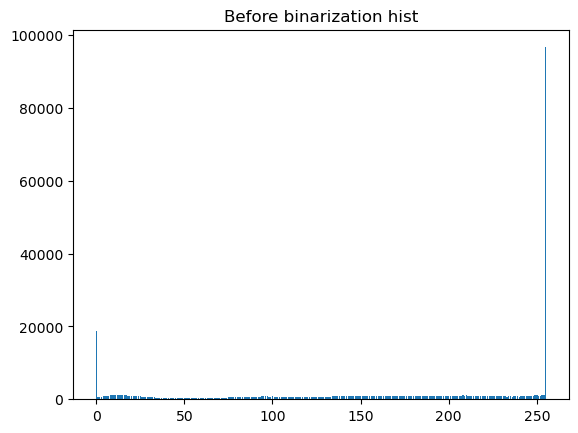

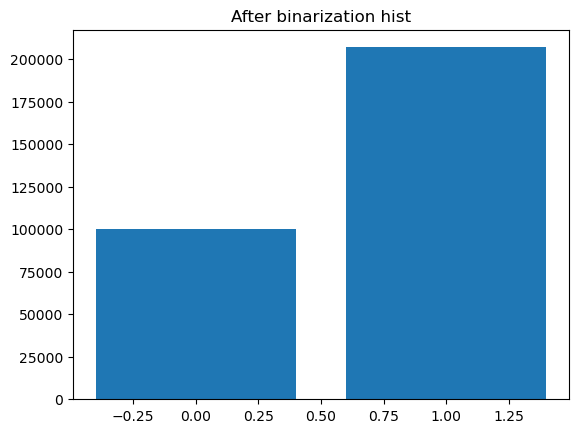

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

gray_img = Image.open('sharpened image.png').convert("LA")
#gray_img = cv2.imread(gray_img)
plt.imshow(gray_img)
plt.title("Before binarization Image")
plt.show()
#gray_img.show()

row = gray_img.size[0]
col = gray_img.size[1]
thr_img = Image.new("1", (row, col))
for x in range(1 , row):
    for y in range(1, col):
        if gray_img.getpixel((x,y))[0] > 128:
            thr_img.putpixel((x,y),1)
        else:
            thr_img.putpixel((x,y),0)
thr_img.save('Binarized final Image.png')          
#cv2.imwrite('Binarized final Image.png',thr_img) .. to use this you should use imwrite first 
plt.imshow(thr_img)
plt.title("Binarized Image")
plt.show()
#thr_img.show()

y = gray_img.histogram()
y = y[0:256]
x = np.arange(len(y))
plt.title("Before binarization hist")
plt.bar(x, y)
plt.show()

y = thr_img.histogram()
y = y[0:2]
x = np.arange(len(y))
plt.title("After binarization hist")
plt.bar(x, y)
plt.show()



# Train tesseract to different printed fonts 

download jTessBoxEditor from here 

https://sourceforge.net/projects/vietocr/files/jTessBoxEditor/    2nd link download

البرنامج ينزل زي الفيديو بالظبط اي غلطة هتتضطر تمسح وتنزل تاني 

added tesseract-ocr of this program  to system path  

it takes tiff image file of this font and recognize characters of that font from the image

following this vid: https://www.youtube.com/watch?v=1v8BPw0Dn0I and trained """ allura font """

moved cofig & tessconfig into tessdata to be trained on fonts (to read box file which put boxes around word  and orher things)
 
Added things to system path to solve problems (see it again)

Allura font is trained successfully and the file is in tessdata called >>> allura.traineddata

also traine blackletter & blade fonts with allura& Stylish_Calligraphy&old_english & jazeel  .. now they are 6 trained fonts




# Apply Tesseract to the final image 


In [30]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

custom_config = r'-l eng  --oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> FINAL IMAGE')
print('-----------------------------------------')
text_from_image=pytesseract.image_to_string('Binarized final Image.png', config=custom_config)
print(text_from_image)

-----------------------------------------
TESSERACT OUTPUT --> FINAL IMAGE
-----------------------------------------
F This is a lot of 12 point text to teetee

; Ger code and see if it works on allies
af file format. a
The quick brown dog jumped ovér tim
lazy fox. The quick brown dog jumped:
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick 4
brown dog jumped over the lazy fox. 9



In [31]:
import os
try: 
    os.remove("saved_img.png")
    os.remove("Binarized Image.png")
    os.remove("rotated.png")
    os.remove("high_contrast.png")
    os.remove("despeckle_filter.png")
    os.remove("Binarized final Image.png")
except: pass

# Secondly: Apply NLP part on the extracted text 

In [14]:
# import the necessary libraries
import nltk
import string
import re

# Text Lowercase:
We lowercase the text to reduce the size of the vocabulary of our text data.

In [15]:
def text_lowercase(text):
    return text.lower()

lowertext=text_lowercase(text_from_image)
print(lowertext)

f this is a lot of 12 point text to teetee

; ger code and see if it works on allies
af file format. a
the quick brown dog jumped ovér tim
lazy fox. the quick brown dog jumped:
over the lazy fox. the quick brown dog
jumped over the lazy fox. the quick 4
brown dog jumped over the lazy fox. 9



# convert the numbers into their textual representations

In [16]:
#pip install inflect

In [17]:
# import the inflect library
import inflect
p = inflect.engine()
 
# convert number into words
def convert_number(text):
    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []
 
    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        # append the word as it is
        else:
            new_string.append(word)
 
    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str
 

textualnums=convert_number(lowertext)
print(textualnums)

f this is a lot of twelve point text to teetee ; ger code and see if it works on allies af file format. a the quick brown dog jumped ovér tim lazy fox. the quick brown dog jumped: over the lazy fox. the quick brown dog jumped over the lazy fox. the quick four brown dog jumped over the lazy fox. nine


# remove punctuation

In [18]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
withoutpunct=remove_punctuation(textualnums)
print(withoutpunct)

f this is a lot of twelve point text to teetee  ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# Contractions Dictionary

In [19]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Expanding Contractions
Contraction helps to expand the word form like "ain't": "am not". 

In [20]:
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



expandtext=expand_contractions(withoutpunct,contractions_dict)
print (expandtext)

f this is a lot of twelve point text to teetee  ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# Remove Tags
Removing html tags from the text like "" using regex.

In [21]:
# coding: utf-8
def remove_Tags(text):
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text
    

notagstext = remove_Tags(expandtext)
print (notagstext)

f this is a lot of twelve point text to teetee  ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


In [22]:
import re
import nltk
from nltk import sent_tokenize
# function for cleaning text like emoj,special character 
def data_processing(text):
    sentences = sent_tokenize(text)
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#><\'\"' , '' ,text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('[0-9]+','', text)
    filtered_text = [w for w in text]
    return ''.join(filtered_text)

# call function 
filtered_text = data_processing(notagstext)
print(filtered_text)

f this is a lot of twelve point text to teetee  ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# Remove whitespaces:
We can use the join and split function to remove all the white spaces in a string

In [23]:
def remove_whitespace(text):
    return  " ".join(text.split())
 
textwithno_space=remove_whitespace(filtered_text)
print(textwithno_space)

f this is a lot of twelve point text to teetee ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# ########################################################

# Spellchecker

In [41]:
#pip install spellchecker
from spellchecker import SpellChecker
 
spell = SpellChecker()
 
# find those words that may be misspelled
#misspelled = spell.unknown(textwithno_space)
correcttext=spell.correction(textwithno_space)
print(correcttext)


f this is a lot of twelve point text to teetee ger code and see if it works on allies af file format a the quick brown dog jumped ovér tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# enchant python library to remove non English words from text

In [52]:
#pip install enchant
#pip install pyenchant  --new version

In [60]:
# import the enchant module
import enchant
# dictionary of en_US
d = enchant.Dict("en_US")

pure_english =''
for word in correcttext:
    if d.check(word):
        pure_english+=word
print(pure_english)

f this is a lot of twelve point text to teetee ger code and see if it works on allies af file format a the quick brown dog jumped ovr tim lazy fox the quick brown dog jumped over the lazy fox the quick brown dog jumped over the lazy fox the quick four brown dog jumped over the lazy fox nine


# Translating text argos model

In [61]:
#pip install argostranslate
#for gui :  !pip install argostranslategui

In [62]:
# Download the file "local translator from"
#import urllib.request
#urllib.request.urlretrieve('https://argosopentech.nyc3.digitaloceanspaces.com/argospm/translate-en_ar-1_0.argosmodel', 'translate-en_ar-1_0.argosmodel')

# Install it
#from argostranslate import package
#package.install_from_path('translate-en_ar-1_0.argosmodel')

In [63]:
from argostranslate import translate

def get_argos_model(source, target):
    lang = f'{source} -> {target}'
    source_lang = [model for model in translate.get_installed_languages() if lang in map(repr, model.translations_from)]
    target_lang = [model for model in translate.get_installed_languages() if lang in map(repr, model.translations_to)]
    
    return source_lang[0].get_translation(target_lang[0])

argos_ru_en = get_argos_model('English', 'Arabic')#English Arabic

In [64]:
translated_text=argos_ru_en.translate(correct_text)
print(translated_text)

(و) هذا هو الكثير من الـ 12 نقطة من النص لأسنان شفرتها ومعرفة ما إذا كان يعمل على حلفاء شكل الملف الكلب البني السريع قفز فوق الثعلب الكسول


# Translation Using MARIAN-MT

In [73]:
#pip install transformers

In [77]:
#pip install typing

In [89]:
from transformers import MarianMTModel, MarianTokenizer
from typing import Sequence
class Translator:
    def __init__(self, source_lang: str, dest_lang: str) -> None:
        self.model_name = f'Helsinki-NLP/opus-mt-{source_lang}-{dest_lang}'
        self.model = MarianMTModel.from_pretrained(self.model_name)
        self.tokenizer = MarianTokenizer.from_pretrained(self.model_name)
        
    def translate(self, texts: Sequence[str]) -> Sequence[str]:
        tokens = self.tokenizer(list(texts), return_tensors="pt", padding=True)
        translate_tokens = self.model.generate(**tokens)
        return [self.tokenizer.decode(t, skip_special_tokens=True) for t in translate_tokens]
marian_en_ar = Translator('en', 'ar')
marian_en_ar.translate([correct_text])


['هذا هو الكثير من 12 نقطة نص إلى وضع شفرة لها ونرى ما إذا كان يعمل على حلفاء ملف تنسيقها']

# Translation using textblob

In [8]:
#pip install textblob
from textblob import TextBlob
#sentence = TextBlob("m name is salma. iam a computer science student")
#sentence.translate(to="ar")
if (blob.detect_language() != 'ar')
    blob.translate(to='ar'))

# Arabic Text Correction

In [37]:
#pip install ar_corrector

In [38]:
from ar_corrector.corrector import Corrector
corr = Corrector()
ar_text=corr.contextual_correct(translated_text)
print(ar_text)

و هذا هو الكثير من إلى أن نقطة من النص الأسنان شفرتها ومعرفة ما إذا كان يعمل على حلفاء شكل الملف الكلب البني السريع قفز فوق الثعلب الكسول


# text to sound

In [70]:
#pip install gTTS

In [90]:
from gtts import gTTS
tts = gTTS(ar_text, lang='ar')
tts.save('test.mp3')
audio_path="test.mp3"
ipd.Audio(audio_path, autoplay=True)

# offline text to sound

In [14]:
#pip install pyttsx3

#Import the library and initialize the engine
import pyttsx3
engine = pyttsx3.init()
#Set the properties of the engine, such as voice and rate
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id) # set voice to male voice
engine.setProperty('rate', 150) # set speaking rate to 150 words per minute
#Convert text to speech using `say()` method
text = "Hello, how are you?"
engine.say(text)
engine.runAndWait()